# Case Study on Unsupervvised Learning

In [ ]:
#importing libraries

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
#Reading the dataset
ds=pd.read_csv(r"C:\Users\91828\Downloads\Wine.csv")

In [5]:
ds.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
ds.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
#hence no null values

In [8]:
ds.shape


(178, 13)

In [9]:
ds.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


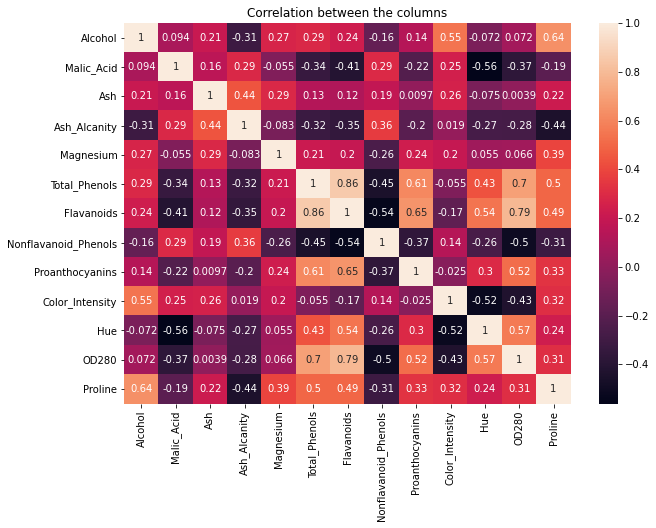

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(ds.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

only few have strong correlation

# KMeans Clustering

C:\Users\91828\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


17592296.383508474
4543749.614531863
2370689.6867829696
1337029.4929415903
916379.1871539167
647326.0020260852
412303.82825080125
323223.2470542671
270954.9292415374
217887.3785603329


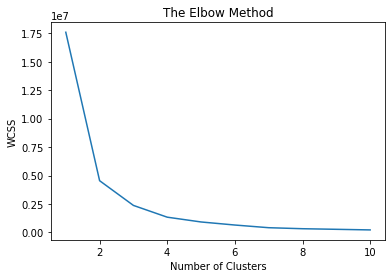

In [18]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
    kmeans.fit(ds)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel("WCSS")
plt.show()

The optimum number of clusters is equal to 3. 

In [58]:
from sklearn.cluster import KMeans                                       
model_kmeans=KMeans(n_clusters=3)
model_kmeans.fit(ds)
labels=model_kmeans.predict(ds)
print(labels)

[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 0 0 2 2 2 2 0 1 0 2 2
 1 0 0 0 2 0 0 1 1 2 2 0 2 2 1 1 2 2 2 0 0 2 0 2 2 0 2 2 0 0 2 0 2 2 0 2 2
 0 2 0 0 0 2 0 0 2 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2
 2 0 0 0 0 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [59]:
model_kmeans.inertia_

0.10338812244963713

In [ ]:
#predict the label by giving input data

In [60]:
sample=[[5.6,3.2,1.2,0.3,2.5,5,2.2,5.6,7.2,0.2,0.8,1.1,4.4]]
new_labels=kmeans.predict(sample)
print(new_labels)

[2]


This comes under label [2]

# Model within these clusters

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(sc,model_kmeans)
pipe.fit(ds)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

# Agglomerative hierarchical clustering

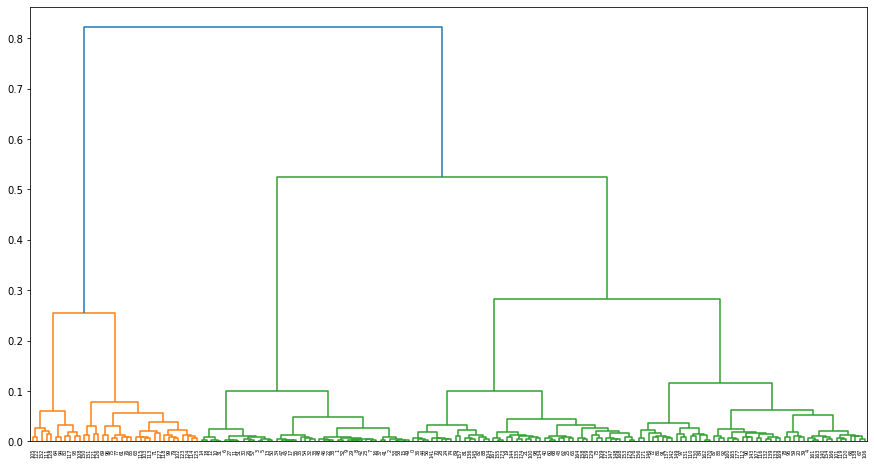

In [62]:
from scipy.cluster.hierarchy import dendrogram ,linkage
import matplotlib.pyplot as plt
link=linkage(ds,method="ward")
plt.figure(figsize=(15,8))
dendrogram(link,orientation="top",distance_sort="ascending",show_leaf_counts=True)
plt.show()

#in this methos the optimum number of cluster is 3

# Model

In [27]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
labels=cluster.fit_predict(ds)
labels

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int64)

# PCA

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(ds)
x_pca = pca.transform(ds)
x_pca.shape

(178, 2)

Text(0, 0.5, 'Second Principal Component')

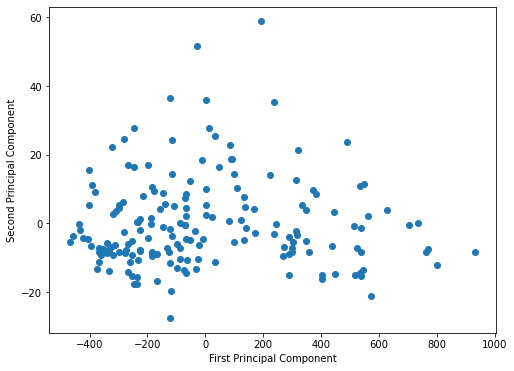

In [32]:
# plotting the PCA components
plt.figure(figsize =(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1] ,cmap ='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [33]:
pca.components_

array([[ 1.65926847e-03, -6.81011951e-04,  1.94905917e-04,
        -4.67129394e-03,  1.78679892e-02,  9.89828076e-04,
         1.56728539e-03, -1.23086472e-04,  6.00606324e-04,
         2.32715078e-03,  1.71379253e-04,  7.04929699e-04,
         9.99821701e-01, -1.57186899e-03],
       [ 1.20649643e-03,  2.15648255e-03,  4.59390366e-03,
         2.64508531e-02,  9.99342995e-01,  8.77740077e-04,
        -5.24033512e-05, -1.35445126e-03,  5.00398928e-03,
         1.51060157e-02, -7.62987233e-04, -3.49595971e-03,
        -1.77760778e-02, -1.44535255e-03]])